In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd

import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


In [2]:
url = "https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M"
html = requests.get(url).text

In [3]:
soup = BeautifulSoup(html, "html5lib")

In [129]:
Toronto_data = pd.DataFrame(columns=['PostalCode', 'Borough'])
for table in soup.find_all("table", attrs={'rules':'all'}):
    for row in table.find_all('td'):
        col = row.find_all('td')
        PostalCode = row.text
        Borough = row.span.text
        Toronto_data = Toronto_data.append({'PostalCode': PostalCode, 'Borough': Borough}, ignore_index = True)
        
Toronto_data.head()

,PostalCode,Borough
0,\nM1ANot assigned\n\n,Not assigned
1,\nM2ANot assigned\n\n,Not assigned
2,\nM3ANorth York(Parkwoods)\n\n,North York(Parkwoods)
3,\nM4ANorth York(Victoria Village)\n\n,North York(Victoria Village)
4,\nM5ADowntown Toronto(Regent Park / Harbourfro...,Downtown Toronto(Regent Park / Harbourfront)


In [44]:
Toronto_data[['Borough', 'Neighborhood']] = Toronto_data['Borough'].str.split("(", n=1, expand = True)
Toronto_data.head()

,PostalCode,Borough,Neighborhood
0,\nM1ANot assigned\n\n,Not assigned,None
1,\nM2ANot assigned\n\n,Not assigned,None
2,\nM3ANorth York(Parkwoods)\n\n,North York,Parkwoods)
3,\nM4ANorth York(Victoria Village)\n\n,North York,Victoria Village)
4,\nM5ADowntown Toronto(Regent Park / Harbourfro...,Downtown Toronto,Regent Park / Harbourfront)


In [45]:
# Removing all spacial character
Toronto_data['Neighborhood'] = ((Toronto_data['Neighborhood'].str.replace("/", ",")).str.replace(")", ""))
Toronto_data.head()


,PostalCode,Borough,Neighborhood
0,\nM1ANot assigned\n\n,Not assigned,None
1,\nM2ANot assigned\n\n,Not assigned,None
2,\nM3ANorth York(Parkwoods)\n\n,North York,Parkwoods
3,\nM4ANorth York(Victoria Village)\n\n,North York,Victoria Village
4,\nM5ADowntown Toronto(Regent Park / Harbourfro...,Downtown Toronto,"Regent Park , Harbourfront"


In [51]:
# Removing all spacial character
Toronto_data['PostalCode'] = ((((Toronto_data['PostalCode'].str.replace("\n", "")).str.replace(")", ""))).str.replace("(", "")).str[:3]
Toronto_data


,PostalCode,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park , Harbourfront"
3,M6A,North York,"Lawrence Manor , Lawrence Heights"
4,M7A,Queen's Park,Ontario Provincial Government
5,M9A,Etobicoke,Islington Avenue
6,M1B,Scarborough,"Malvern , Rouge"
7,M3B,North York,Don MillsNorth
8,M4B,East York,"Parkview Hill , Woodbine Gardens"
9,M5B,Downtown Toronto,"Garden District, Ryerson"


In [52]:
# Remove the Not assigned Borough

Toronto_data = (Toronto_data[~Toronto_data['Borough'].isin(['Not assigned'])])
Toronto_data.head()

,PostalCode,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park , Harbourfront"
3,M6A,North York,"Lawrence Manor , Lawrence Heights"
4,M7A,Queen's Park,Ontario Provincial Government


In [53]:
Toronto_data.reset_index(drop=True, inplace=True)
Toronto_data.head(12)

,PostalCode,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park , Harbourfront"
3,M6A,North York,"Lawrence Manor , Lawrence Heights"
4,M7A,Queen's Park,Ontario Provincial Government
5,M9A,Etobicoke,Islington Avenue
6,M1B,Scarborough,"Malvern , Rouge"
7,M3B,North York,Don MillsNorth
8,M4B,East York,"Parkview Hill , Woodbine Gardens"
9,M5B,Downtown Toronto,"Garden District, Ryerson"


In [54]:
Toronto_data.shape

(103, 3)

## Geocoder 

In [55]:
import geocoder

In [56]:
# Downloading the Long. Lat. for each Neighborhood

postal_code = Toronto_data['PostalCode']

# Using while Statement
latitude = []
longitude = []
n = 0

while n < len(postal_code):
    g = geocoder.arcgis('{}, Toronto, Ontario'.format(postal_code[n]))
    lat_lng_coords = g.latlng
    print('The geograpical coordinate of {} are {}, {}.'.format(postal_code[n], lat_lng_coords[0], lat_lng_coords[1]))
    latitude.append(lat_lng_coords[0])
    longitude.append(lat_lng_coords[1])
    n = n + 1

Toronto_data['Latitude'] = latitude
Toronto_data['Longitude'] = longitude

Toronto_data

The geograpical coordinate of M3A are 43.75245000000007, -79.32990999999998.
The geograpical coordinate of M4A are 43.73057000000006, -79.31305999999995.
The geograpical coordinate of M5A are 43.65512000000007, -79.36263999999994.
The geograpical coordinate of M6A are 43.72327000000007, -79.45041999999995.
The geograpical coordinate of M7A are 43.66253000000006, -79.39187999999996.
The geograpical coordinate of M9A are 43.662630000000036, -79.52830999999998.
The geograpical coordinate of M1B are 43.811390000000074, -79.19661999999994.
The geograpical coordinate of M3B are 43.74923000000007, -79.36185999999998.
The geograpical coordinate of M4B are 43.70718000000005, -79.31191999999999.
The geograpical coordinate of M5B are 43.65739000000008, -79.37803999999994.
The geograpical coordinate of M6B are 43.70687000000004, -79.44811999999996.
The geograpical coordinate of M9B are 43.65034000000003, -79.55361999999997.
The geograpical coordinate of M1C are 43.78574000000003, -79.1587499999999

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.75245,-79.32991
1,M4A,North York,Victoria Village,43.73057,-79.31306
2,M5A,Downtown Toronto,"Regent Park , Harbourfront",43.65512,-79.36264
3,M6A,North York,"Lawrence Manor , Lawrence Heights",43.72327,-79.45042
4,M7A,Queen's Park,Ontario Provincial Government,43.66253,-79.39188
5,M9A,Etobicoke,Islington Avenue,43.66263,-79.52831
6,M1B,Scarborough,"Malvern , Rouge",43.81139,-79.19662
7,M3B,North York,Don MillsNorth,43.74923,-79.36186
8,M4B,East York,"Parkview Hill , Woodbine Gardens",43.70718,-79.31192
9,M5B,Downtown Toronto,"Garden District, Ryerson",43.65739,-79.37804


In [57]:
Toronto_data.head(12)

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.75245,-79.32991
1,M4A,North York,Victoria Village,43.73057,-79.31306
2,M5A,Downtown Toronto,"Regent Park , Harbourfront",43.65512,-79.36264
3,M6A,North York,"Lawrence Manor , Lawrence Heights",43.72327,-79.45042
4,M7A,Queen's Park,Ontario Provincial Government,43.66253,-79.39188
5,M9A,Etobicoke,Islington Avenue,43.66263,-79.52831
6,M1B,Scarborough,"Malvern , Rouge",43.81139,-79.19662
7,M3B,North York,Don MillsNorth,43.74923,-79.36186
8,M4B,East York,"Parkview Hill , Woodbine Gardens",43.70718,-79.31192
9,M5B,Downtown Toronto,"Garden District, Ryerson",43.65739,-79.37804


In [58]:
Toronto_data.groupby('Borough').count()

,PostalCode,Neighborhood,Latitude,Longitude
Borough,,,,
Central Toronto,9,9,9,9
Downtown Toronto,17,17,17,17
Downtown TorontoStn A PO Boxes25 The Esplanade,1,1,1,1
East Toronto,4,4,4,4
East TorontoBusiness reply mail Processing Centre969 Eastern,1,1,1,1
East York,4,4,4,4
East YorkEast Toronto,1,1,1,1
Etobicoke,11,11,11,11
EtobicokeNorthwest,1,1,1,1


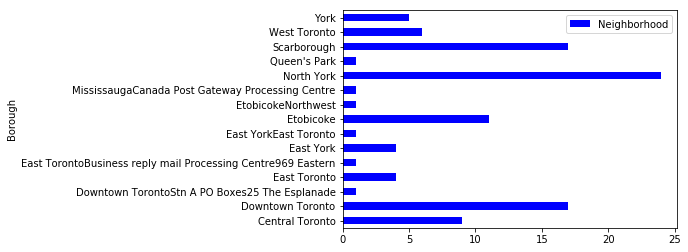

In [59]:
%matplotlib inline
Toronto_data.groupby('Borough').count().plot(kind='barh', y = 'Neighborhood' , color = 'blue')

### Exploring the Borough's that hasToronto 

Extracting the Borough that contains Toronto to perform the analysis. The Borough's containing toronto was chosen because it has more neighborhoods and can be help for more analysis

In [60]:
new_Toronto_data = Toronto_data[Toronto_data['Borough'].str.contains('Toronto')]
new_Toronto_data.reset_index(drop=True, inplace=True)
new_Toronto_data

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M5A,Downtown Toronto,"Regent Park , Harbourfront",43.65512,-79.36264
1,M5B,Downtown Toronto,"Garden District, Ryerson",43.65739,-79.37804
2,M5C,Downtown Toronto,St. James Town,43.65215,-79.37587
3,M4E,East Toronto,The Beaches,43.67709,-79.29547
4,M5E,Downtown Toronto,Berczy Park,43.64536,-79.37306
5,M5G,Downtown Toronto,Central Bay Street,43.65609,-79.38493
6,M6G,Downtown Toronto,Christie,43.66869,-79.42071
7,M5H,Downtown Toronto,"Richmond , Adelaide , King",43.64970,-79.38258
8,M6H,West Toronto,"Dufferin , Dovercourt Village",43.66505,-79.43891
9,M4J,East YorkEast Toronto,The Danforth East,43.68811,-79.33418


In [61]:
address = 'Toronto, Canada'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto are 43.6534817, -79.3839347.


### Map of Toronto City with all neighborhoods shown on the map

In [62]:
# create map of Toronto using latitude and longitude values

map_toronto = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map
for lat, lng, borough, neighborhood in zip(Toronto_data['Latitude'], Toronto_data['Longitude'], Toronto_data['Borough'], Toronto_data['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

### Extract all Borough's that contains Downtown Toronto

In [63]:
Toronto_neigh = Toronto_data[Toronto_data['Borough'].str.contains('Downtown Toronto')].reset_index(drop=True)
print(Toronto_neigh.shape)
Toronto_neigh.head()

(18, 5)


,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M5A,Downtown Toronto,"Regent Park , Harbourfront",43.65512,-79.36264
1,M5B,Downtown Toronto,"Garden District, Ryerson",43.65739,-79.37804
2,M5C,Downtown Toronto,St. James Town,43.65215,-79.37587
3,M5E,Downtown Toronto,Berczy Park,43.64536,-79.37306
4,M5G,Downtown Toronto,Central Bay Street,43.65609,-79.38493


### Neighborhoods of Downtown Toronto on the map

In [64]:
address = 'Toronto, Canada'

geolocator = Nominatim(user_agent="canada_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto are 43.6534817, -79.3839347.


In [65]:
# create map of Toronto using latitude and longitude values
map_toronto_neigh = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(Toronto_neigh['Latitude'], Toronto_neigh['Longitude'], Toronto_neigh['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto_neigh)  
    
map_toronto_neigh

### Extract all Borough's that contains North York

In [66]:
Toronto_neigh1 = Toronto_data[Toronto_data['Borough'].str.contains('North York')].reset_index(drop=True)
print(Toronto_neigh1.shape)
Toronto_neigh1.head()

(24, 5)


,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.75245,-79.32991
1,M4A,North York,Victoria Village,43.73057,-79.31306
2,M6A,North York,"Lawrence Manor , Lawrence Heights",43.72327,-79.45042
3,M3B,North York,Don MillsNorth,43.74923,-79.36186
4,M6B,North York,Glencairn,43.70687,-79.44812


### Neighborhoods of North York on the map

In [67]:
address = 'North York, Canada'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of North York are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of North York are 43.7543263, -79.44911696639593.


In [68]:
# create map of Toronto using latitude and longitude values
map_toronto_neigh1 = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(Toronto_neigh1['Latitude'], Toronto_neigh1['Longitude'], Toronto_neigh1['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='black',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto_neigh1)  
    
map_toronto_neigh1

### Extract all Borough's that contains Scarborough

In [70]:
Toronto_neigh2 = Toronto_data[Toronto_data['Borough'].str.contains('Scarborough')].reset_index(drop=True)
print(Toronto_neigh2.shape)
Toronto_neigh2.head()

(17, 5)


,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M1B,Scarborough,"Malvern , Rouge",43.81139,-79.19662
1,M1C,Scarborough,"Rouge Hill , Port Union , Highland Creek",43.78574,-79.15875
2,M1E,Scarborough,"Guildwood , Morningside , West Hill",43.76575,-79.17470
3,M1G,Scarborough,Woburn,43.76812,-79.21761
4,M1H,Scarborough,Cedarbrae,43.76944,-79.23892


### Neighborhoods of Scarborough on the map

In [71]:
address = 'Toronto, Canada'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto are 43.6534817, -79.3839347.


In [72]:
# create map of Toronto using latitude and longitude values
map_toronto_neigh2 = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(Toronto_neigh2['Latitude'], Toronto_neigh2['Longitude'], Toronto_neigh2['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='Purple',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto_neigh2)  
    
map_toronto_neigh2

### Define Foursquare Credentials and Version

In [73]:
CLIENT_ID = 'IZBJPNKQM2J14H51AQLAE4P5KLJO5SIY1YLXXAD0XYQU0BMJ' # your Foursquare ID
CLIENT_SECRET = 'ZEPNHO3B3RYR3GSQ2RORBKBOKLYFCMXPQTV1CF0A41LRAEU0' # your Foursquare Secret
ACCESS_TOKEN = 'ADJREH5T05BGKPSGHFG5KDLO5D432GUO4KKXJGLLRNZNPKS2' # your FourSquare Access Token
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: IZBJPNKQM2J14H51AQLAE4P5KLJO5SIY1YLXXAD0XYQU0BMJ
CLIENT_SECRET:ZEPNHO3B3RYR3GSQ2RORBKBOKLYFCMXPQTV1CF0A41LRAEU0


In [74]:
Toronto_neigh.loc[5, 'Neighborhood']

'Christie'

#### Get the neighborhood's latitude and longitude values for Downtown Toronto using foursquare

In [75]:
neighborhood_latitude = Toronto_neigh.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = Toronto_neigh.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = Toronto_neigh.loc[5, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Christie are 43.65512000000007, -79.36263999999994.


#### Get top 100 venues that are within a radius of 700 meters of Downtown Toronto

In [76]:
LIMIT = 100
radius = 700

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?&client_id=IZBJPNKQM2J14H51AQLAE4P5KLJO5SIY1YLXXAD0XYQU0BMJ&client_secret=ZEPNHO3B3RYR3GSQ2RORBKBOKLYFCMXPQTV1CF0A41LRAEU0&v=20180604&ll=43.65512000000007,-79.36263999999994&radius=700&limit=100'

In [77]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '60e7e37f7a38fd146019aeb9'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Corktown',
  'headerFullLocation': 'Corktown, Toronto',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 90,
  'suggestedBounds': {'ne': {'lat': 43.66142000630008,
    'lng': -79.35394867572582},
   'sw': {'lat': 43.64881999370006, 'lng': -79.37133132427407}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '53b8466a498e83df908c3f21',
       'name': 'Tandem Coffee',
       'location': {'address': '368 King St E',
        'crossStreet': 'at Trinity St',
        'lat': 43.65355870959944,
        'lng': -79.36180945913513,
        'labeledLatLngs': [{'label':

### Extracting the category of the venues for Downtown Toronto

In [78]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [79]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues

,name,categories,lat,lng
0,Tandem Coffee,Coffee Shop,43.653559,-79.361809
1,Roselle Desserts,Bakery,43.653447,-79.362017
2,Rooster Coffee,Coffee Shop,43.651900,-79.365609
3,Berkeley Church,Event Space,43.655123,-79.365873
4,Sumach Espresso,Coffee Shop,43.658135,-79.359515
5,Body Blitz Spa East,Spa,43.654735,-79.359874
6,Figs Breakfast & Lunch,Breakfast Spot,43.655675,-79.364503
7,Mangia and Bevi Resto-Bar,Italian Restaurant,43.652250,-79.366355
8,Sukhothai,Thai Restaurant,43.658444,-79.365681
9,Impact Kitchen,Restaurant,43.656369,-79.356980


#### how many venues were returned by Downtown Toronto Foursquare

In [80]:
print('{} venues returned by Foursquare.'.format(nearby_venues.shape[0]))

90 venues returned by Foursquare.


### Explore Neighborhoods in Downtown Toronto with their nearby venues

In [81]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [82]:
Toronto_venues = getNearbyVenues(names=Toronto_neigh['Neighborhood'],
                                   latitudes=Toronto_neigh['Latitude'],
                                   longitudes=Toronto_neigh['Longitude']
                                  )

Regent Park , Harbourfront
Garden District, Ryerson
St. James Town
Berczy Park
Central Bay Street
Christie
Richmond , Adelaide , King
Harbourfront East , Union Station , Toronto Islands
Toronto Dominion Centre , Design Exchange
Commerce Court , Victoria Hotel
University of Toronto , Harbord
Kensington Market , Chinatown , Grange Park
CN Tower , King and Spadina , Railway Lands , Harbourfront West , Bathurst Quay , South Niagara , Island airport
Rosedale
Enclave of M5E
St. James Town , Cabbagetown
First Canadian Place , Underground city
Church and Wellesley


In [83]:
Toronto_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Berczy Park,63,63,63,63,63,63
"CN Tower , King and Spadina , Railway Lands , Harbourfront West , Bathurst Quay , South Niagara , Island airport",81,81,81,81,81,81
Central Bay Street,64,64,64,64,64,64
Christie,10,10,10,10,10,10
Church and Wellesley,83,83,83,83,83,83
"Commerce Court , Victoria Hotel",100,100,100,100,100,100
Enclave of M5E,100,100,100,100,100,100
"First Canadian Place , Underground city",100,100,100,100,100,100
"Garden District, Ryerson",100,100,100,100,100,100


Let's find out how many unique categories can be curated from all the returned venues

In [84]:
print('There are {} uniques categories.'.format(len(Toronto_venues['Venue Category'].unique())))

There are 189 uniques categories.


In [85]:
#Toronto_venues.groupby('Venue Category').count()

### Analyzing Each Neighborhood

In [86]:
# Convert the categorical data to Numerical data using one-hot encoding 
Toronto_onehot = pd.get_dummies(Toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
Toronto_onehot['Neighborhood'] = Toronto_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [Toronto_onehot.columns[-1]] + list(Toronto_onehot.columns[:-1])
Toronto_onehot = Toronto_onehot[fixed_columns]

Toronto_onehot.head()

,Yoga Studio,American Restaurant,Antique Shop,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Basketball Stadium,Beer Bar,Beer Store,Belgian Restaurant,Bike Trail,Bistro,Boat or Ferry,Bookstore,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Burger Joint,Burrito Place,Butcher,Café,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Gym,College Rec Center,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Cosmetics Shop,Creperie,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Distribution Center,Dog Run,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Escape Room,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Fish Market,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Furniture / Home Store,Gaming Cafe,Garden,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Historic Site,Hobby Shop,Hookah Bar,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Restaurant,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Lake,Latin American Restaurant,Lingerie Store,Liquor Store,Lounge,Marijuana Dispensary,Market,Martial Arts School,Massage Studio,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Museum,Music Venue,Neighborhood,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Other Nightlife,Park,Performing Arts Venue,Peruvian Restaurant,Pet Store,Pharmacy,Pie Shop,Pizza Place,Playground,Plaza,Poke Place,Poutine Place,Pub,Ramen Restaurant,Record Shop,Restaurant,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Smoke Shop,Snack Place,Soup Place,Souvlaki Shop,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Steakhouse,Strip Club,Supermarket,Sushi Restaurant,Taco Place,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tea Room,Thai Restaurant,Theater,Theme Restaurant,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Wings Joint
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"Regent Park , Harbourfront",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"Regent Park , Harbourfront",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"Regent Park , Harbourfront",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [87]:
Toronto_onehot.shape

(1204, 189)

In [88]:
Toronto_grouped = Toronto_onehot.groupby('Neighborhood').mean().reset_index()
Toronto_grouped

,Neighborhood,Yoga Studio,American Restaurant,Antique Shop,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Basketball Stadium,Beer Bar,Beer Store,Belgian Restaurant,Bike Trail,Bistro,Boat or Ferry,Bookstore,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Burger Joint,Burrito Place,Butcher,Café,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Gym,College Rec Center,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Cosmetics Shop,Creperie,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Distribution Center,Dog Run,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Escape Room,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Fish Market,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Furniture / Home Store,Gaming Cafe,Garden,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Historic Site,Hobby Shop,Hookah Bar,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Restaurant,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Lake,Latin American Restaurant,Lingerie Store,Liquor Store,Lounge,Marijuana Dispensary,Market,Martial Arts School,Massage Studio,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Museum,Music Venue,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Other Nightlife,Park,Performing Arts Venue,Peruvian Restaurant,Pet Store,Pharmacy,Pie Shop,Pizza Place,Playground,Plaza,Poke Place,Poutine Place,Pub,Ramen Restaurant,Record Shop,Restaurant,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Smoke Shop,Snack Place,Soup Place,Souvlaki Shop,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Steakhouse,Strip Club,Supermarket,Sushi Restaurant,Taco Place,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tea Room,Thai Restaurant,Theater,Theme Restaurant,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Wings Joint
0,Berczy Park,0.015873,0.000000,0.015873,0.000000,0.015873,0.000000,0.000000,0.000000,0.000000,0.0,0.015873,0.047619,0.000000,0.000000,0.000000,0.031746,0.000000,0.000000,0.0,0.015873,0.000000,0.000000,0.00,0.031746,0.000000,0.000000,0.000000,0.000000,0.000000,0.015873,0.0,0.000000,0.031746,0.000000,0.00,0.00,0.015873,0.047619,0.047619,0.000000,0.000000,0.00,0.00,0.015873,0.000000,0.015873,0.000000,0.015873,0.00,0.000000,0.000000,0.015873,0.000000,0.015873,0.000000,0.000000,0.000000,0.000000,0.000000,0.015873,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.031746,0.000000,0.000000,0.015873,0.000000,0.00,0.000000,0.015873,0.015873,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.015873,0.015873,0.015873,0.000000,0.000000,0.000000,0.000000,0.00,0.015873,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.031746,0.015873,0.015873,0.000000,0.000000,0.000000,0.000000,0.000000,0.015873,0.031746,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.015873,0.000000,0.015873,0.015873,0.015873,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.015873,0.000000,0.00,0.000000,0.015873,0.000000,0.000000,0.000000,0.031746,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.031746,0.000000,0.000000,0.031746,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,

In [89]:
Toronto_grouped.shape

(18, 189)

In [90]:
num_top_venues = 5

for hood in Toronto_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = Toronto_grouped[Toronto_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Berczy Park----
                venue  freq
0        Cocktail Bar  0.05
1              Bakery  0.05
2         Coffee Shop  0.05
3  Seafood Restaurant  0.05
4         Cheese Shop  0.03


----CN Tower , King and Spadina , Railway Lands , Harbourfront West , Bathurst Quay , South Niagara , Island airport----
                venue  freq
0  Italian Restaurant  0.07
1         Coffee Shop  0.06
2                Café  0.05
3                Park  0.04
4       Grocery Store  0.04


----Central Bay Street----
                       venue  freq
0                Coffee Shop  0.11
1             Clothing Store  0.06
2  Middle Eastern Restaurant  0.03
3           Sushi Restaurant  0.03
4                 Restaurant  0.03


----Christie----
           venue  freq
0           Café   0.3
1  Grocery Store   0.2
2     Playground   0.1
3    Coffee Shop   0.1
4    Candy Store   0.1


----Church and Wellesley----
                 venue  freq
0          Coffee Shop  0.11
1  Japanese Restaurant  0.06
2     S

In [91]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [124]:
num_top_venues = 5

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = Toronto_grouped['Neighborhood']

for ind in np.arange(Toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Berczy Park,Coffee Shop,Cocktail Bar,Bakery,Seafood Restaurant,Lounge
1,"CN Tower , King and Spadina , Railway Lands , ...",Italian Restaurant,Coffee Shop,Café,French Restaurant,Grocery Store
2,Central Bay Street,Coffee Shop,Clothing Store,Restaurant,Sushi Restaurant,Middle Eastern Restaurant
3,Christie,Café,Grocery Store,Candy Store,Playground,Baby Store
4,Church and Wellesley,Coffee Shop,Japanese Restaurant,Sushi Restaurant,Restaurant,Gay Bar


### Cluster Neighborhoods

In [125]:
# set number of clusters
kclusters = 5

Toronto_grouped_clustering = Toronto_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([1, 1, 1, 2, 1, 1, 1, 1, 1, 1])

In [126]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

Toronto_merged = Toronto_neigh

# merge manhattan_grouped with manhattan_data to add latitude/longitude for each neighborhood
Toronto_merged = Toronto_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

Toronto_merged.head() # check the last columns!

,PostalCode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,M5A,Downtown Toronto,"Regent Park , Harbourfront",43.65512,-79.36264,3,Coffee Shop,Breakfast Spot,Restaurant,Yoga Studio,Event Space
1,M5B,Downtown Toronto,"Garden District, Ryerson",43.65739,-79.37804,1,Coffee Shop,Sandwich Place,Clothing Store,Hotel,Café
2,M5C,Downtown Toronto,St. James Town,43.65215,-79.37587,1,Coffee Shop,Cocktail Bar,Cosmetics Shop,Café,Italian Restaurant
3,M5E,Downtown Toronto,Berczy Park,43.64536,-79.37306,1,Coffee Shop,Cocktail Bar,Bakery,Seafood Restaurant,Lounge
4,M5G,Downtown Toronto,Central Bay Street,43.65609,-79.38493,1,Coffee Shop,Clothing Store,Restaurant,Sushi Restaurant,Middle Eastern Restaurant


In [127]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Toronto_merged['Latitude'], Toronto_merged['Longitude'], Toronto_merged['Neighborhood'], Toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-
                      1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

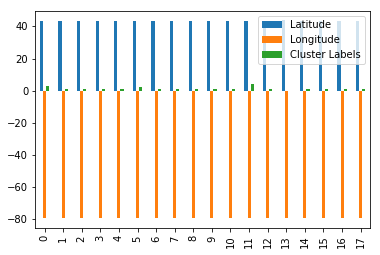

In [96]:
Toronto_merged.plot(kind='bar')

#### Get the neighborhood's latitude and longitude values for North York using foursquare

In [97]:
neighborhood_latitude1 = Toronto_neigh1.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude1 = Toronto_neigh1.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name1 = Toronto_neigh1.loc[5, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name1, 
                                                               neighborhood_latitude1, 
                                                               neighborhood_longitude1))

Latitude and longitude values of Don MillsSouth(Flemingdon Park are 43.75245000000007, -79.32990999999998.


#### Get top 100 venues that are within a radius of 700 meters of North York

In [98]:
LIMIT = 100
radius = 700

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude1, 
    neighborhood_longitude1, 
    radius, 
    LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?&client_id=IZBJPNKQM2J14H51AQLAE4P5KLJO5SIY1YLXXAD0XYQU0BMJ&client_secret=ZEPNHO3B3RYR3GSQ2RORBKBOKLYFCMXPQTV1CF0A41LRAEU0&v=20180604&ll=43.75245000000007,-79.32990999999998&radius=700&limit=100'

In [99]:
results1 = requests.get(url).json()
results1

{'meta': {'code': 200, 'requestId': '60e7e3de5056f40221a695a2'},
 'response': {'headerLocation': 'Parkwoods - Donalda',
  'headerFullLocation': 'Parkwoods - Donalda, Toronto',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 5,
  'suggestedBounds': {'ne': {'lat': 43.758750006300076,
    'lng': -79.3212045534121},
   'sw': {'lat': 43.74614999370006, 'lng': -79.33861544658787}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4e6696b6d16433b9ffff47c3',
       'name': 'KFC',
       'location': {'lat': 43.75438666345904,
        'lng': -79.3330206627504,
        'labeledLatLngs': [{'label': 'display',
          'lat': 43.75438666345904,
          'lng': -79.3330206627504}],
        'distance': 330,
        'cc': 'CA',
        'country': 'Canada',
        'for

### Extracting the category of the venues for North York

In [100]:
def get_category_type_1(row):
    try:
        categories_list_1 = row['categories']
    except:
        categories_list_1 = row['venue.categories']
        
    if len(categories_list_1) == 0:
        return None
    else:
        return categories_list_1[0]['name']

In [101]:
venues1 = results1['response']['groups'][0]['items']
    
nearby_venues1 = json_normalize(venues1) # flatten JSON

# filter columns
filtered_columns1 = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues1 =nearby_venues1.loc[:, filtered_columns]

# filter the category for each row
nearby_venues1['venue.categories'] = nearby_venues1.apply(get_category_type_1, axis=1)

# clean columns
nearby_venues1.columns = [col.split(".")[-1] for col in nearby_venues1.columns]

nearby_venues1

,name,categories,lat,lng
0,KFC,Fast Food Restaurant,43.754387,-79.333021
1,Brookbanks Park,Park,43.751976,-79.332140
2,Variety Store,Food & Drink Shop,43.751974,-79.333114
3,PetSmart,Pet Store,43.748639,-79.333488
4,Joey,Burger Joint,43.753441,-79.321640


#### how many venues were returned by North York Foursquare

In [102]:
print('{} venues returned by Foursquare.'.format(nearby_venues1.shape[0]))

5 venues returned by Foursquare.


#### Get the neighborhood's latitude and longitude values for Scarborough using foursquare

In [103]:
neighborhood_latitude2 = Toronto_neigh2.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude2 = Toronto_neigh2.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name2 = Toronto_neigh2.loc[5, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name2, 
                                                               neighborhood_latitude2, 
                                                               neighborhood_longitude2))

Latitude and longitude values of Scarborough Village are 43.811390000000074, -79.19661999999994.


#### Get top 100 venues that are within a radius of 700 meters of Scarborough

In [108]:
LIMIT = 100
radius = 700

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude2, 
    neighborhood_longitude2, 
    radius, 
    LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?&client_id=IZBJPNKQM2J14H51AQLAE4P5KLJO5SIY1YLXXAD0XYQU0BMJ&client_secret=ZEPNHO3B3RYR3GSQ2RORBKBOKLYFCMXPQTV1CF0A41LRAEU0&v=20180604&ll=43.811390000000074,-79.19661999999994&radius=700&limit=100'

In [109]:
results2 = requests.get(url).json()
results2

{'meta': {'code': 200, 'requestId': '60e7e402ec94416606846891'},
 'response': {'headerLocation': 'Malvern',
  'headerFullLocation': 'Malvern, Toronto',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 5,
  'suggestedBounds': {'ne': {'lat': 43.81769000630008,
    'lng': -79.18790596680905},
   'sw': {'lat': 43.805089993700065, 'lng': -79.20533403319082}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4bb6b9446edc76b0d771311c',
       'name': 'Wendy’s',
       'location': {'crossStreet': 'Morningside & Sheppard',
        'lat': 43.80744841934756,
        'lng': -79.19905558052072,
        'labeledLatLngs': [{'label': 'display',
          'lat': 43.80744841934756,
          'lng': -79.19905558052072}],
        'distance': 480,
        'cc': 'CA',
        '

### Extracting the category of the venues for North York

In [110]:
def get_category_type_2(row):
    try:
        categories_list_2 = row['categories']
    except:
        categories_list_2 = row['venue.categories']
        
    if len(categories_list_2) == 0:
        return None
    else:
        return categories_list_2[0]['name']

In [111]:
venues2 = results2['response']['groups'][0]['items']
    
nearby_venues2 = json_normalize(venues2) # flatten JSON

# filter columns
filtered_columns2 = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues2 =nearby_venues2.loc[:, filtered_columns]

# filter the category for each row
nearby_venues2['venue.categories'] = nearby_venues2.apply(get_category_type_2, axis=1)

# clean columns
nearby_venues2.columns = [col.split(".")[-1] for col in nearby_venues2.columns]

nearby_venues2

,name,categories,lat,lng
0,Wendy’s,Fast Food Restaurant,43.807448,-79.199056
1,Wood Bison Paddock,Zoo Exhibit,43.811732,-79.200708
2,Ontrack Services,Financial or Legal Service,43.816399,-79.199157
3,Moose Exhibit,Zoo Exhibit,43.816823,-79.193432
4,Grizzly Bear Exhibit,Zoo Exhibit,43.817031,-79.193458


In [112]:
print('{} venues returned by Foursquare.'.format(nearby_venues2.shape[0]))

5 venues returned by Foursquare.
